In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [54]:
#%%bash
#wget "https://pjreddie.com/media/files/yolov3.weights"

In [55]:
#%%bash
#wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

In [56]:
CONFIDENCE = 0.6
SCORE_THRESHOLD = 0.6
IOU_THRESHOLD = 0.6
# the neural network weights configuration
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'

# loading all the class labels (object)
labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]
# generating colours for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [57]:
colors.shape

(80, 3)

In [58]:
# load the YOLO network
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

In [59]:
type(net)

cv2.dnn.Net

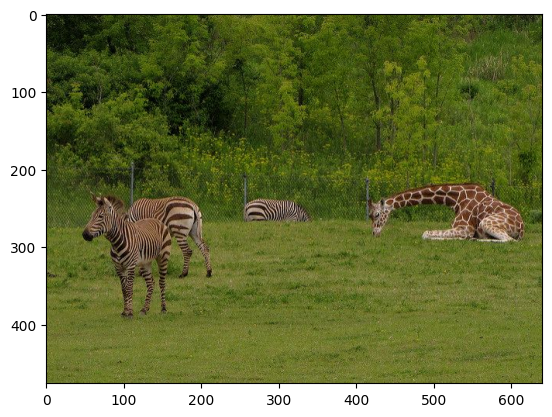

In [60]:
import os
image = cv2.imread('jungle.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename('jungle.jpg')
filename, ext = file_name.split('.')

plt.imshow(image);

In [61]:
h, w = image.shape[:2]
# create 4D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

In [62]:
blob.shape

(1, 3, 416, 416)

In [63]:
image.shape
blob.shape

(1, 3, 416, 416)

In [64]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [65]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [66]:
# sets the blob as the input of the network
net.setInput(blob)
# get all the layer names
ln = net.getLayerNames()
# get the output layer names
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    # in case getUnconnectedOutLayers() returns 1D array when CUDA isnt available
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
# feed forward (inference) and get the network output
layers_outputs = net.forward(ln)

layers_outputs

(array([[0.03155247, 0.04028403, 0.28403947, ..., 0.        , 0.        ,
         0.        ],
        [0.04219297, 0.0294946 , 0.23797372, ..., 0.        , 0.        ,
         0.        ],
        [0.03956942, 0.03125083, 0.8829473 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9573964 , 0.95129865, 0.49436393, ..., 0.        , 0.        ,
         0.        ],
        [0.9560443 , 0.9671822 , 0.32762206, ..., 0.        , 0.        ,
         0.        ],
        [0.9637412 , 0.9515038 , 0.78527254, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02102786, 0.01836234, 0.05919967, ..., 0.        , 0.        ,
         0.        ],
        [0.01356249, 0.01778921, 0.297508  , ..., 0.        , 0.        ,
         0.        ],
        [0.02029595, 0.01704775, 0.08835562, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96978503, 0.9751966 , 0.04962498, ..., 0.        , 0.        ,
         0.        

In [67]:
layer_outputsfont_scale = 0.7
thickness = 2
boxes, confidences, class_ids = [], [], []
# loop over each of the layer outputs
for output in layers_outputs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # discard out weak predictions by ensuring the detected
        # probability is greater than the minimun probability
        if confidence > CONFIDENCE:
          # scale the bounding box coordinates back relative to the
          # size of the image, keeping in mind that YOLO actually
          # returns the center (x, y)-coordinates of the bounding box
          # followed by the boxes' width and height
          box = detection[0:4] * np.array([w, h, w, h])
          (centerX, centerY, width, height) = box.astype("int")

          # use the center (x, y)-coordinates to derive the top and
          # and left corner of the bounding box
          x = int(centerX - (width / 2))
          y = int(centerY - (height / 2))

          # update our list of bounding box coordinates, confidences
          # and class IDs
          boxes.append([x, y, int(width), int(height)])
          confidences.append(float(confidence))
          class_ids.append(class_id)

In [68]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [69]:
confidences

[0.6346844434738159,
 0.9911091923713684,
 0.8938906192779541,
 0.6215727925300598,
 0.9985881447792053,
 0.7890708446502686,
 0.995597779750824,
 0.8802229762077332,
 0.8385530114173889,
 0.9966028928756714,
 0.680671751499176,
 0.9988306760787964,
 0.700495183467865]

In [70]:
# loop over the indexes we are keeping
for i in range(len(boxes)):
    # extract the bounding box coordinates
    x, y = boxes[i][0], boxes[i][1]
    w, h = boxes[i][2], boxes[i][3]

    # draw a bounding box rectangle and label on the image
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=2)
    text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"

    # calculate text width & height to draw the trasperant boxes as background of the text
    (text_width, text_height) = cv2.getTextSize(
        text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.4, thickness=2)[0]
    text_offset_x = x
    text_offset_y = y - 5
    box_coords = ((text_offset_x, text_offset_y),
     (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(image, box_coords[0], box_coords[1], color=color,
                  thickness=cv2.FILLED)

    # add opacity (transparency to the box)
    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)

    # now put the text (label: confidence %)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.2, color=(0, 0, 0), thickness=2)


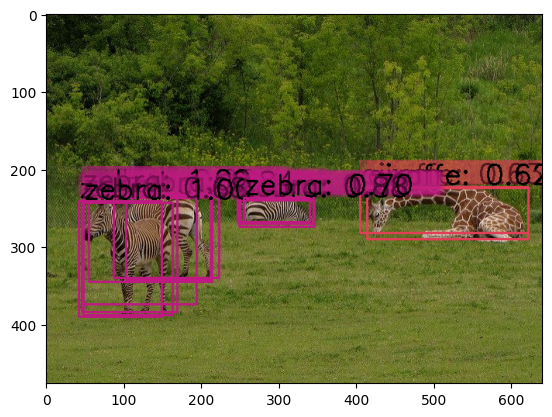

In [71]:
plt.imshow(image);